In [2]:
import numpy as np
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

In [3]:
# Load extracted features and labels
features = np.load("../../data/features/cnn_training_features.npy")
labels = np.load("../../data/features/cnn_training_labels.npy")
frame_names = np.load("../../data/features/cnn_training_frame_names.npy")

In [4]:

# Print dataset details
print(f"Feature Shape: {features.shape}")  # Expected: (num_samples, 2048) for ResNet50
print(f"Labels Shape: {labels.shape}")  # Expected: (num_samples,)
print(f"Example Frame Name: {frame_names[:10]}")
print(f"Example Feature Vector: {features[:10]}")
print(f"Example Label: {labels[:10]}")

print(f"Feature Mean: {features.mean():.4f}")
print(f"Feature Std: {features.std():.4f}")
print(f"Min Value: {features.min():.4f}, Max Value: {features.max():.4f}")

Feature Shape: (44820, 2048)
Labels Shape: (44820,)
Example Frame Name: ['/vol/scratch/SoC/misc/2024/sc22jg/frames/0002_21/frame_000000_unknown.jpg'
 '/vol/scratch/SoC/misc/2024/sc22jg/frames/0002_21/frame_000005_unknown.jpg'
 '/vol/scratch/SoC/misc/2024/sc22jg/frames/0002_21/frame_000010_unknown.jpg'
 '/vol/scratch/SoC/misc/2024/sc22jg/frames/0002_21/frame_000015_unknown.jpg'
 '/vol/scratch/SoC/misc/2024/sc22jg/frames/0002_21/frame_000020_unknown.jpg'
 '/vol/scratch/SoC/misc/2024/sc22jg/frames/0002_21/frame_000025_unknown.jpg'
 '/vol/scratch/SoC/misc/2024/sc22jg/frames/0002_21/frame_000030_unknown.jpg'
 '/vol/scratch/SoC/misc/2024/sc22jg/frames/0002_21/frame_000035_unknown.jpg'
 '/vol/scratch/SoC/misc/2024/sc22jg/frames/0002_21/frame_000040_unknown.jpg'
 '/vol/scratch/SoC/misc/2024/sc22jg/frames/0002_21/frame_000045_unknown.jpg']
Example Feature Vector: [[1.5577872  0.21321724 1.9175777  ... 0.30706626 0.12782729 1.0458742 ]
 [1.5702001  0.18787403 1.9043682  ... 0.33576563 0.17799626

In [5]:
# Reduce to 2D with t-SNE
tsne = TSNE(n_components=2, perplexity=40, random_state=0)
features_2D = tsne.fit_transform(features[:10000])  # Use a subset for speed

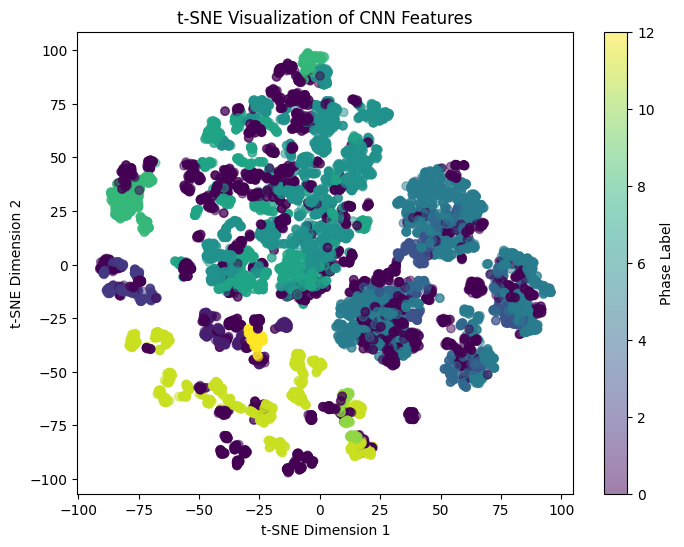

In [7]:
# Scatter plot
plt.figure(figsize=(8,6))
plt.scatter(features_2D[:, 0], features_2D[:, 1], c=labels[:10000], cmap="viridis", alpha=0.5)
plt.colorbar(label="Phase Label")
plt.xlabel("t-SNE Dimension 1")
plt.ylabel("t-SNE Dimension 2")
plt.title("t-SNE Visualization of CNN Features")

output_path = "../../reports/visuals/features/t-SNE-visualisation.png"

plt.savefig(output_path, dpi=300, bbox_inches="tight")

plt.show()